### About Dataset
##### Context
With the rapid development of telecommunication industry, the service providers are inclined more towards expansion of the subscriber base. To meet the need of surviving in the competitive environment, the retention of existing customers has become a huge challenge. It is stated that the cost of acquiring a new customer is far more than that for retaining the existing one. Therefore, it is imperative for the telecom industries to use advanced analytics to understand consumer behavior and in-turn predict the association of the customers as whether or not they will leave the company.

##### Content
This data set contains customer level information for a telecom company. Various attributes related to the services used are recorded for each customer.

##### Inspiration
Some possible insights could be:
- What variables are contributing to customer churn?
- Who are the customers more likely to churn?
- What actions can be taken to stop them from leaving?

### Loading Dependencies

In [390]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Data

In [391]:
df = pd.read_csv("./data/telecom_churn.csv")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [396]:
df.iloc[:,0]

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

In [395]:
df.iloc[:,1:]

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...
3328,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [314]:
df.shape

(3333, 11)

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


### Exploratory Data Analysis

In [316]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

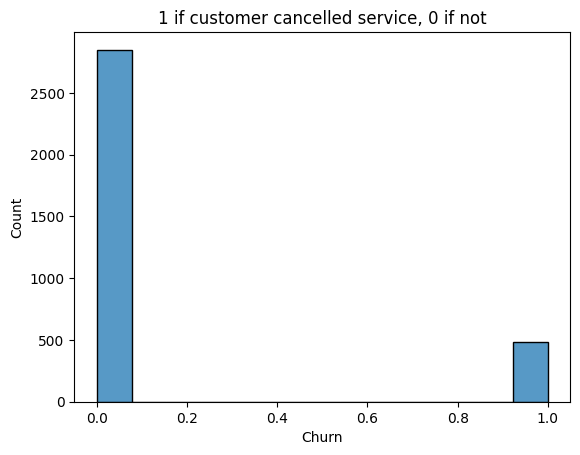

In [317]:
sns.histplot(df['Churn'])
plt.title('1 if customer cancelled service, 0 if not')
plt.show()

In [318]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

Insights: The dataset is quite imbalanced

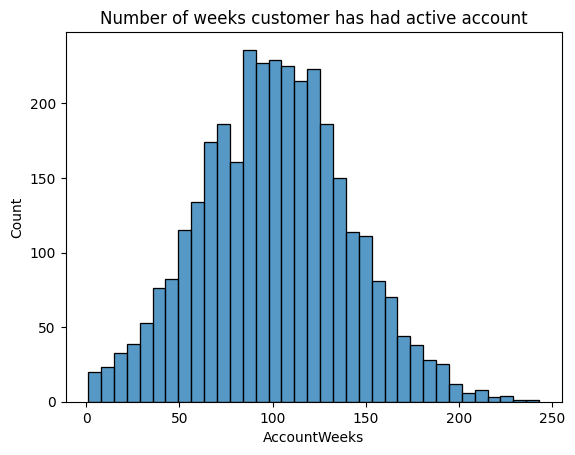

In [319]:
sns.histplot(df['AccountWeeks'])
plt.title('Number of weeks customer has had active account')
plt.show()

Insights: The distribution of the number of weeks customer has had active account follows a normal distribution

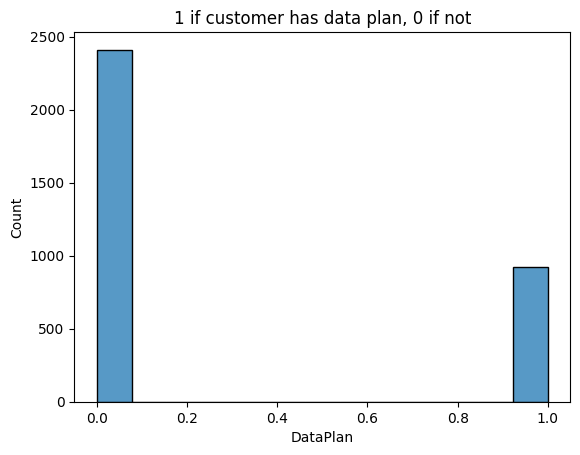

In [320]:
sns.histplot(df['DataPlan'])
plt.title('1 if customer has data plan, 0 if not')
plt.show()

Insights: More than Half of the customers do not have a data plan

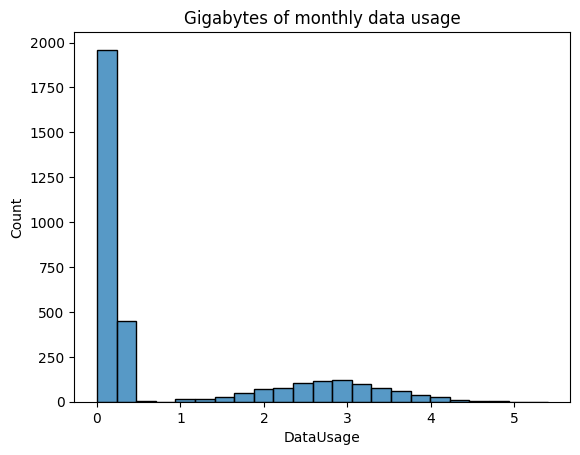

In [321]:
sns.histplot(df['DataUsage'])
plt.title('Gigabytes of monthly data usage')
plt.show()

Insights: Alot of customers consumer less than 1 Gigabyte per month while the rest consumes 1-5 Gigabytes per month

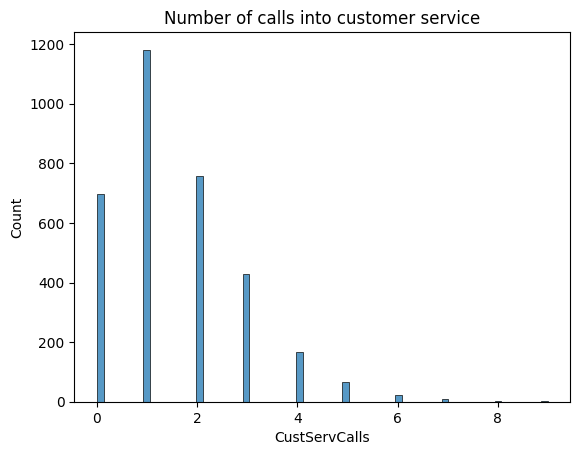

In [322]:
sns.histplot(df['CustServCalls'])
plt.title('Number of calls into customer service')
plt.show()

Insights: Alot of customers have 0 to 3 customer service calling per month with 1 being the most

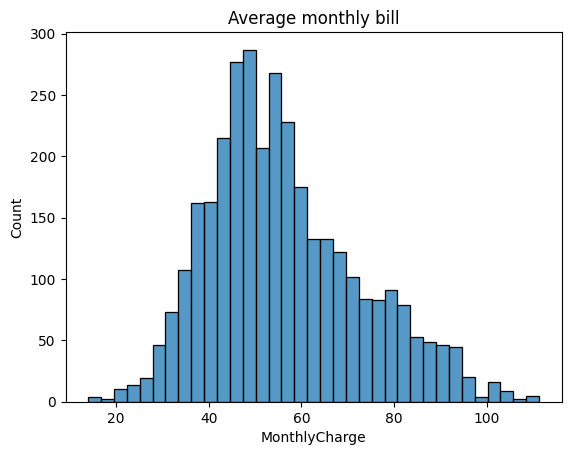

In [323]:
sns.histplot(df['MonthlyCharge'])
plt.title('Average monthly bill')
plt.show()

Insights: The monthly charge distribution of customers is somewhat normal but a little left skewed showing there are more customer bills above the median meaning that the majority of customers have higher bills, while a smaller portion of customers may have lower bills.

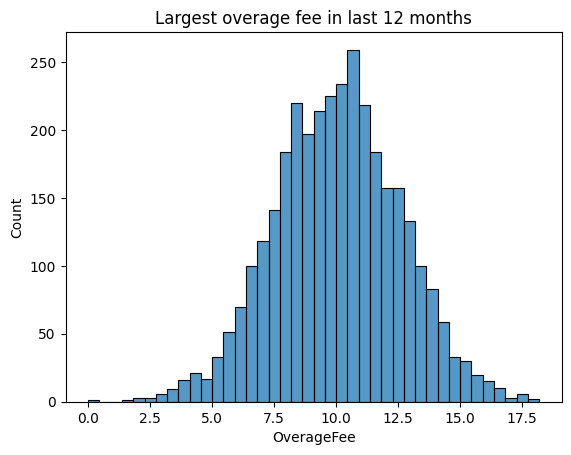

In [324]:
sns.histplot(df['OverageFee'])
plt.title('Largest overage fee in last 12 months')
plt.show()

# An overage fee is a charge imposed by a service provider when a customer exceeds the predefined limits or allowances included in their service plan. It applies when the customer goes beyond the allocated usage, such as exceeding data limits, talk time, text messages, or any other service included in their plan.

Insights: The customer's overage fee is also follows a normal distribution although it's a little left skewed 

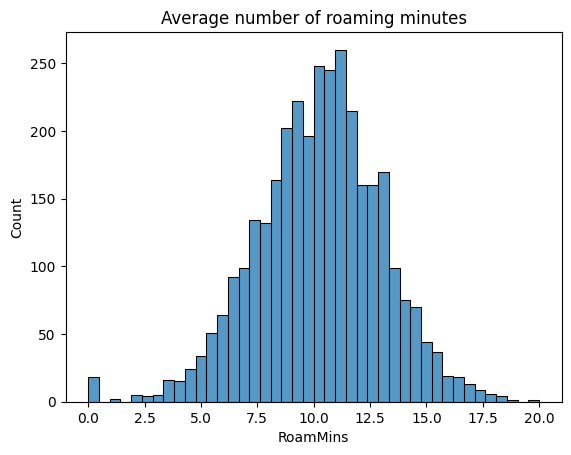

In [325]:
sns.histplot(df['RoamMins'])
plt.title('Average number of roaming minutes')
plt.show()

Insights: The distribution of customer roaming minutes follows a normal distribution

In [326]:
# Checking for missing values
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [327]:
# Checking for duplicated records
df.duplicated().sum()

0

<AxesSubplot: >

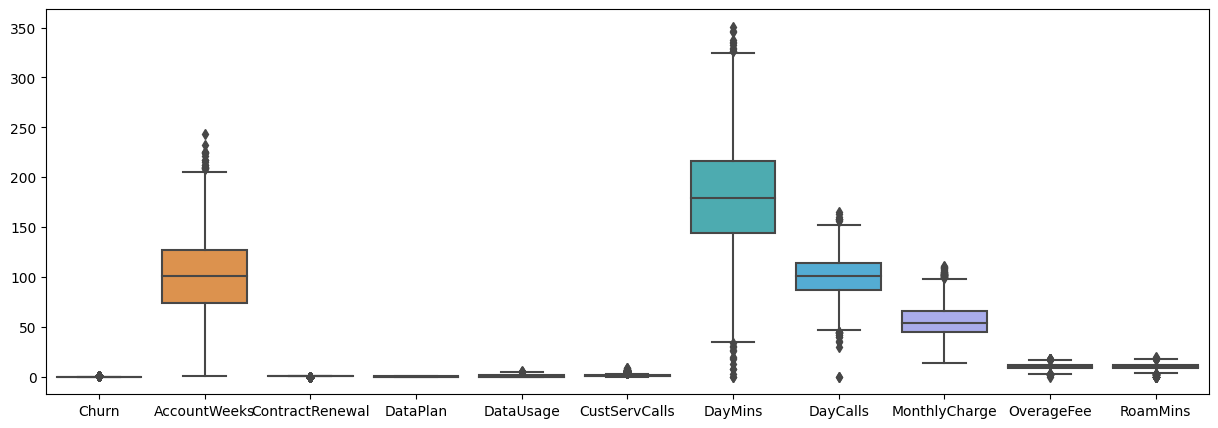

In [328]:
# Checking for Outliers
plt.figure(figsize=(15,5))
sns.boxplot(df)

In [329]:
# Handling our Imbalanced Dataset
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [330]:
df_minority = df[df['Churn']==1]
df_majority = df[df['Churn']==0]
# we are creating two dataframes where the target is 1 is df_minority and where the target is 0 is df_majority

In [331]:
# We will make use of this module
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace=True, # replace = True means that it will peform sample with replacement: this is when you sampling out data from a population, when you take out a sample you return it back while you want to take another sample
        n_samples = len(df_majority), # this is how much you want to increase
        random_state = 42, # So that the seed is fixed
        )

In [332]:
df_minority_upsampled.shape

(2850, 11)

In [333]:
df_minority_upsampled.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
787,1,24,1,0,0.0,2,265.6,86,63.0,10.44,11.1
2994,1,128,1,0,0.0,1,227.9,130,65.0,15.13,5.5
2526,1,57,0,0,0.0,0,115.0,65,30.0,6.12,6.4
1978,1,106,0,0,0.0,3,204.0,84,49.0,8.43,13.3
830,1,121,0,0,0.0,3,167.7,94,37.0,4.69,13.4


In [334]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
830,1,121,0,0,0.00,3,167.7,94,37.0,4.69,13.4
2419,1,37,1,0,0.00,2,239.9,120,64.0,13.08,8.9
2213,1,98,1,0,0.20,0,217.2,121,65.0,15.17,12.4
905,1,161,1,0,0.16,4,191.9,113,40.6,3.55,13.4


In [335]:
df_upsampled.duplicated().sum()

2369

Due to our upsampling our records have been duplicated to balance our data, we would make use of SMOTE to create synthetic instances

In [336]:
from imblearn.over_sampling import SMOTE

In [337]:
# transform the dataset
oversample = SMOTE()
X,y = oversample.fit_resample(df, df['Churn'])

In [338]:
X.shape, y.shape

((5700, 11), (5700,))

In [339]:
len(y[y==0])

2850

In [340]:
len(y[y==1])

2850

In [341]:
df1 = pd.DataFrame(X,columns=df.columns[1:])
df2 = pd.DataFrame(y, columns=['Churn'])
df = pd.concat([df1, df2], axis=1)
df

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,128,1,1,2.700000,1,265.100000,110,89.000000,9.870000,10.000000,0
1,107,1,1,3.700000,1,161.600000,123,82.000000,9.780000,13.700000,0
2,137,1,0,0.000000,0,243.400000,114,52.000000,6.060000,12.200000,0
3,84,0,0,0.000000,2,299.400000,71,57.000000,3.100000,6.600000,0
4,75,0,0,0.000000,3,166.700000,113,41.000000,7.420000,10.100000,0
...,...,...,...,...,...,...,...,...,...,...,...
5695,151,1,0,0.127833,1,221.643334,88,64.728838,15.052727,13.891970,1
5696,20,1,0,0.000000,1,316.271698,114,74.104184,11.407194,11.357916,1
5697,140,0,0,0.000000,3,140.698269,90,37.759710,7.754747,10.565325,1
5698,71,1,0,0.037285,2,291.297171,108,71.023303,12.393564,10.053394,1


In [342]:
oversample_df.duplicated().sum()

0

<AxesSubplot: >

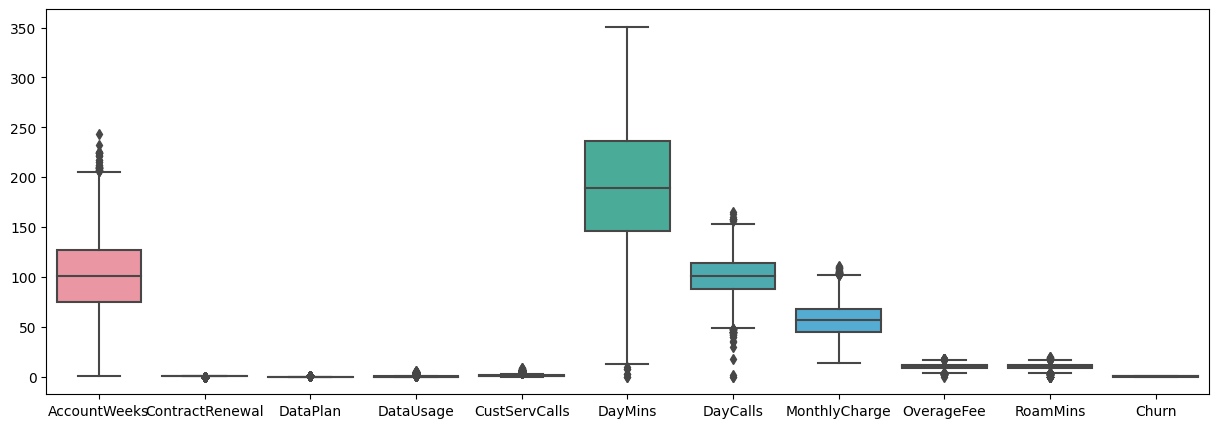

In [343]:
# Handling the Outliers
plt.figure(figsize=(15,5))
sns.boxplot(df)

In [344]:
def getUpperandLower(data, column):
    Q1 = np.percentile(data[column], 25, method='midpoint')
    Q3 = np.percentile(data[column], 75, method='midpoint')
    IQR = Q3 - Q1
    upper = Q3 +1.5*IQR
    lower = Q1 - 1.5*IQR
    return (upper, lower)

In [345]:
def handleOutliers(data, column):
    upper, lower = getUpperandLower(data, column)
    data.loc[data[column] > upper, column] = data[column].median()
    data.loc[data[column] < lower, column] = data[column].median()
    # data.loc[data[column] < lower][column] = data[column].median() gave an error called " SettingWithCopyWarning" from pandas

We will apply this to non binary columns

In [347]:
handleOutliers(df, 'AccountWeeks')

In [349]:
handleOutliers(df, 'DataUsage')

In [350]:
handleOutliers(df, 'DayMins')

In [351]:
handleOutliers(df, 'DayCalls')

In [352]:
handleOutliers(df, 'MonthlyCharge')

In [353]:
handleOutliers(df, 'OverageFee')

In [354]:
handleOutliers(df, 'RoamMins')

<AxesSubplot: >

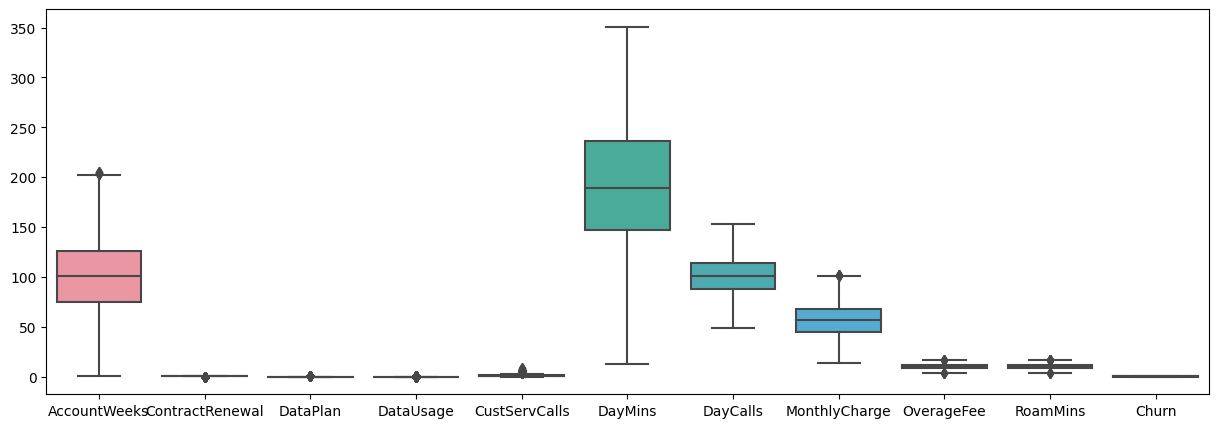

In [355]:
plt.figure(figsize=(15,5))
sns.boxplot(df)

In [357]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [358]:
scaler = StandardScaler()

In [359]:
scaler.fit_transform(df[['AccountWeeks', 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']])

array([[ 0.70509906, -0.45301113,  1.18974241, ...,  2.05585407,
        -0.2024585 , -0.17475217],
       [ 0.15256351, -0.45301113, -0.4801381 , ...,  1.604486  ,
        -0.2409035 ,  1.3678271 ],
       [ 0.9419    , -0.45301113,  0.8396322 , ..., -0.32994857,
        -1.82996357,  0.74245712],
       ...,
       [ 1.02083365, -0.45301113, -0.81736895, ..., -1.24817889,
        -1.10602397,  0.06093943],
       [-0.79464028, -0.16294877,  1.61241048, ...,  0.89669594,
         0.87552382, -0.15249162],
       [ 0.09994108, -0.45301113,  1.35473211, ...,  0.93247408,
         1.62651119,  0.02370366]])

In [360]:
df1 = pd.DataFrame(scaler.fit_transform(df[['AccountWeeks', 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']]), columns = ['AccountWeeks', 'DataUsage', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins'])
df1

,AccountWeeks,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0.705099,-0.453011,1.189742,0.483131,2.055854,-0.202459,-0.174752
1,0.152564,-0.453011,-0.480138,1.172095,1.604486,-0.240904,1.367827
2,0.941900,-0.453011,0.839632,0.695120,-0.329949,-1.829964,0.742457
3,-0.452594,-0.453011,1.743142,-1.583763,-0.007543,0.023618,-1.592257
4,-0.689395,-0.453011,-0.397854,0.642122,-1.039241,-1.249017,-0.133061
...,...,...,...,...,...,...,...
5695,1.310257,0.541480,0.488608,-0.682809,0.490822,2.011430,1.447862
5696,-2.136512,-0.453011,2.015352,0.695120,1.095355,0.454180,0.391381
5697,1.020834,-0.453011,-0.817369,-0.576815,-1.248179,-1.106024,0.060939
5698,-0.794640,-0.162949,1.612410,0.377136,0.896696,0.875524,-0.152492


In [361]:
df = pd.concat([df1, df[['ContractRenewal', 'DataPlan', 'CustServCalls', 'Churn']]], axis=1)
df

,AccountWeeks,DataUsage,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,ContractRenewal,DataPlan,CustServCalls,Churn
0,0.705099,-0.453011,1.189742,0.483131,2.055854,-0.202459,-0.174752,1,1,1,0
1,0.152564,-0.453011,-0.480138,1.172095,1.604486,-0.240904,1.367827,1,1,1,0
2,0.941900,-0.453011,0.839632,0.695120,-0.329949,-1.829964,0.742457,1,0,0,0
3,-0.452594,-0.453011,1.743142,-1.583763,-0.007543,0.023618,-1.592257,0,0,2,0
4,-0.689395,-0.453011,-0.397854,0.642122,-1.039241,-1.249017,-0.133061,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
5695,1.310257,0.541480,0.488608,-0.682809,0.490822,2.011430,1.447862,1,0,1,1
5696,-2.136512,-0.453011,2.015352,0.695120,1.095355,0.454180,0.391381,1,0,1,1
5697,1.020834,-0.453011,-0.817369,-0.576815,-1.248179,-1.106024,0.060939,0,0,3,1
5698,-0.794640,-0.162949,1.612410,0.377136,0.896696,0.875524,-0.152492,1,0,2,1


In [389]:
import pickle

with open('./artifacts/df.pkl', 'wb') as file:
    pickle.dump(df, file)

with open('./artifacts/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)